In [3]:
import numpy as np
import pandas as pd

In [5]:
data=pd.read_csv(r"/content/dataset.csv")

In [ ]:
data

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1


In [6]:
op_var="market_value"

### DATA EXPLORATION

In [7]:
x=data[data.columns[~data.columns.isin([op_var])]]

In [8]:
y=data[[op_var]]

In [9]:
df=pd.concat([x,y],axis=1)
df

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,market_value
0,Alexis Sanchez,Arsenal,28,LW,1,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0,65.0
1,Mesut Ozil,Arsenal,28,AM,1,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0,50.0
2,Petr Cech,Arsenal,35,GK,4,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0,7.0
3,Theo Walcott,Arsenal,28,RW,1,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0,20.0
4,Laurent Koscielny,Arsenal,31,CB,3,912,6.0,0.70%,121,2.0,France,0,4,1,1,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1,5.0
457,Arthur Masuaku,West+Ham,23,LB,3,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1,7.0
458,Sam Byram,West+Ham,23,RB,3,198,4.5,0.30%,29,1.0,England,0,2,20,0,0,4.5
459,Ashley Fletcher,West+Ham,21,CF,1,412,4.5,5.90%,16,1.0,England,0,1,20,0,1,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   page_views    461 non-null    int64  
 6   fpl_value     461 non-null    float64
 7   fpl_sel       461 non-null    object 
 8   fpl_points    461 non-null    int64  
 9   region        460 non-null    float64
 10  nationality   461 non-null    object 
 11  new_foreign   461 non-null    int64  
 12  age_cat       461 non-null    int64  
 13  club_id       461 non-null    int64  
 14  big_club      461 non-null    int64  
 15  new_signing   461 non-null    int64  
 16  market_value  461 non-null    float64
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [11]:
df.region.value_counts().sort_values(ascending=False)

2.0    207
1.0    156
4.0     56
3.0     41
Name: region, dtype: int64

In [12]:
df['region']=df['region'].fillna(2.0)

In [13]:
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
market_value    0
dtype: int64

In [14]:
temp_df=df.copy()

In [15]:
def addpos_cat(inputcat):
  if inputcat==1:
    return('Attackers')
  elif inputcat==2:
    return('Midfielders')
  elif inputcat==3:
    return('Defenders')
  else:
    return('Goalkeeper')
temp_df['position_cat']=temp_df['position_cat'].apply(addpos_cat)

In [16]:
def add_region(inputregion):
  if inputregion==1:
    return ('England')
  elif inputregion==2:
    return ('EU')
  elif inputregion==3:
    return ('Americans')
  else:
    return ('Rest of World')
temp_df['region']=temp_df['region'].apply(add_region)

In [17]:
temp_df.head()

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,market_value
0,Alexis Sanchez,Arsenal,28,LW,Attackers,4329,12.0,17.10%,264,Americans,Chile,0,4,1,1,0,65.0
1,Mesut Ozil,Arsenal,28,AM,Attackers,4395,9.5,5.60%,167,EU,Germany,0,4,1,1,0,50.0
2,Petr Cech,Arsenal,35,GK,Goalkeeper,1529,5.5,5.90%,134,EU,Czech Republic,0,6,1,1,0,7.0
3,Theo Walcott,Arsenal,28,RW,Attackers,2393,7.5,1.50%,122,England,England,0,4,1,1,0,20.0
4,Laurent Koscielny,Arsenal,31,CB,Defenders,912,6.0,0.70%,121,EU,France,0,4,1,1,0,22.0


In [18]:
temp_df[['age_cat','age']].corr()

,age_cat,age
age_cat,1.000000,0.972199
age,0.972199,1.000000


In [19]:
def retrieve_age_categories(temp_data):
  int_age_categories=sorted(temp_data['age_cat'].unique())
  age_categories={}
  for i in int_age_categories:
    record=(temp_data[temp_data['age_cat']==i])
    age_categories[i]=str(min(record['age']))+"-"+str(max(record['age']))
  return age_categories
age_categories=retrieve_age_categories(temp_df)
age_categories


{1: '17-21', 2: '22-24', 3: '25-27', 4: '28-31', 5: '32-33', 6: '34-38'}

In [20]:
def age_category_convert(input_age_cat,age_categories):
  return age_categories[input_age_cat]
temp_df['age_cat']=temp_df['age_cat'].apply(age_category_convert,args=(age_categories,))

In [21]:
temp_df.head()

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,market_value
0,Alexis Sanchez,Arsenal,28,LW,Attackers,4329,12.0,17.10%,264,Americans,Chile,0,28-31,1,1,0,65.0
1,Mesut Ozil,Arsenal,28,AM,Attackers,4395,9.5,5.60%,167,EU,Germany,0,28-31,1,1,0,50.0
2,Petr Cech,Arsenal,35,GK,Goalkeeper,1529,5.5,5.90%,134,EU,Czech Republic,0,34-38,1,1,0,7.0
3,Theo Walcott,Arsenal,28,RW,Attackers,2393,7.5,1.50%,122,England,England,0,28-31,1,1,0,20.0
4,Laurent Koscielny,Arsenal,31,CB,Defenders,912,6.0,0.70%,121,EU,France,0,28-31,1,1,0,22.0


In [22]:
for col in temp_df.columns:
  print(col,': ',len(temp_df[col].unique()),'labels')

name :  461 labels
club :  20 labels
age :  22 labels
position :  13 labels
position_cat :  4 labels
page_views :  389 labels
fpl_value :  17 labels
fpl_sel :  113 labels
fpl_points :  153 labels
region :  4 labels
nationality :  61 labels
new_foreign :  2 labels
age_cat :  6 labels
club_id :  20 labels
big_club :  2 labels
new_signing :  2 labels
market_value :  48 labels


## Numerical Values

In [23]:
numerical_features=[feature for feature in temp_df.columns if temp_df[feature].dtypes!='O']
print('Number of numerical variables: ',len(numerical_features))
temp_df[numerical_features].head()

Number of numerical variables:  9


,age,page_views,fpl_value,fpl_points,new_foreign,club_id,big_club,new_signing,market_value
0,28,4329,12.0,264,0,1,1,0,65.0
1,28,4395,9.5,167,0,1,1,0,50.0
2,35,1529,5.5,134,0,1,1,0,7.0
3,28,2393,7.5,122,0,1,1,0,20.0
4,31,912,6.0,121,0,1,1,0,22.0


In [24]:
discrete_feature=[feature for feature in numerical_features if len(temp_df[feature].unique())<23]
print("Disrete feature count: {}".format(len(discrete_feature)))
discrete_feature

Disrete feature count: 6


['age', 'fpl_value', 'new_foreign', 'club_id', 'big_club', 'new_signing']

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

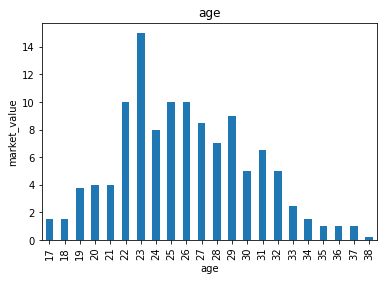

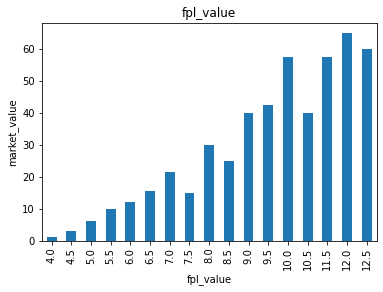

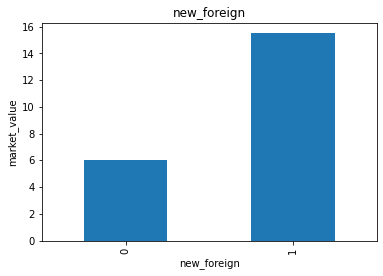

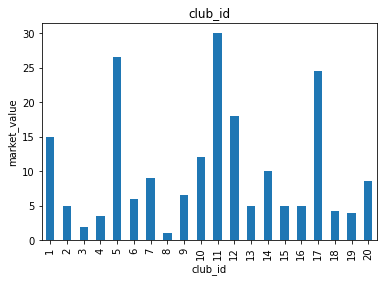

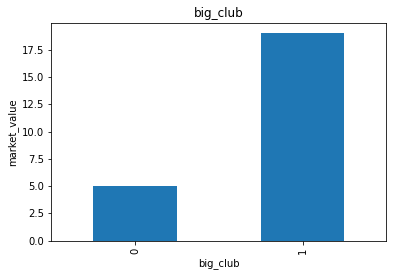

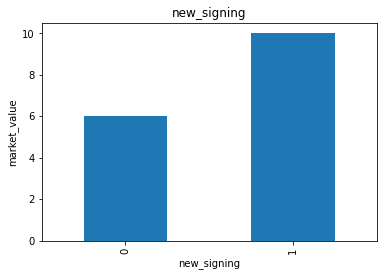

In [26]:
for feature in discrete_feature:
  temp_data=data.copy()
  temp_data.groupby(feature)['market_value'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('market_value')
  plt.title(feature)
  plt.show()

## Continuous Variable

In [27]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous_feature count {}".format(len(continuous_feature)))
continuous_feature

Continuous_feature count 3


['page_views', 'fpl_points', 'market_value']

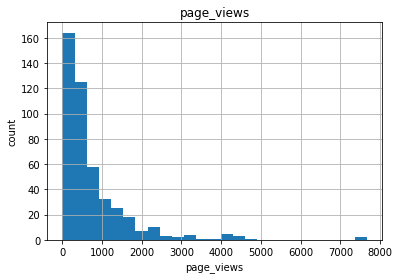

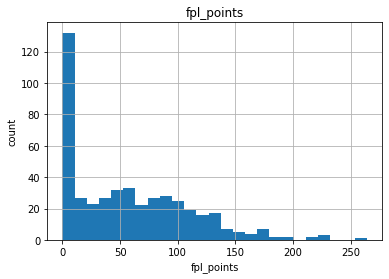

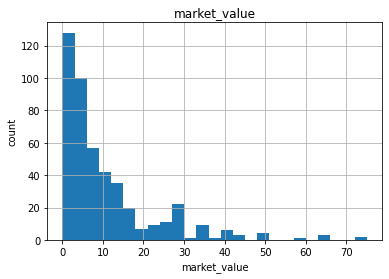

In [28]:
for feature in continuous_feature:
  temp_data=data.copy()
  temp_data[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.title(feature)
  plt.show()

In [29]:
corr=temp_df.corr()
corr

,age,page_views,fpl_value,fpl_points,new_foreign,club_id,big_club,new_signing,market_value
age,1.000000,-0.048682,-0.097659,0.187785,-0.125400,-0.002868,-0.123566,-0.079190,-0.132396
page_views,-0.048682,1.000000,0.730640,0.542464,-0.049725,-0.092409,0.502982,0.127249,0.739657
fpl_value,-0.097659,0.730640,1.000000,0.618837,0.108650,-0.060884,0.423556,0.098314,0.788653
fpl_points,0.187785,0.542464,0.618837,1.000000,-0.204837,0.041094,0.280061,0.085720,0.615155
new_foreign,-0.125400,-0.049725,0.108650,-0.204837,1.000000,-0.002786,0.080949,-0.078193,0.098056
club_id,-0.002868,-0.092409,-0.060884,0.041094,-0.002786,1.000000,-0.155667,0.134085,-0.046068
big_club,-0.123566,0.502982,0.423556,0.280061,0.080949,-0.155667,1.000000,0.035508,0.593483
new_signing,-0.079190,0.127249,0.098314,0.085720,-0.078193,0.134085,0.035508,1.000000,0.131321
market_value,-0.132396,0.739657,0.788653,0.615155,0.098056,-0.046068,0.593483,0.131321,1.000000


In [30]:
corr['market_value'].sort_values()

age            -0.132396
club_id        -0.046068
new_foreign     0.098056
new_signing     0.131321
big_club        0.593483
fpl_points      0.615155
page_views      0.739657
fpl_value       0.788653
market_value    1.000000
Name: market_value, dtype: float64

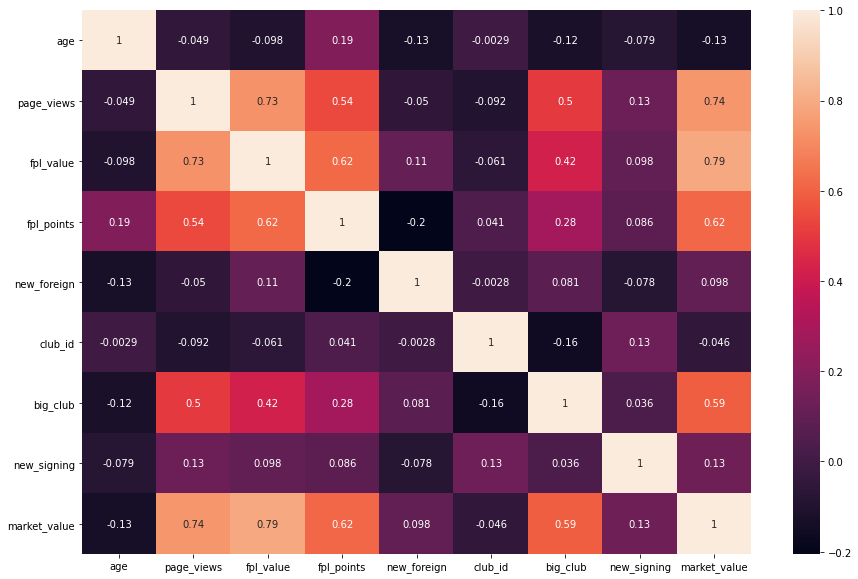

In [31]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [32]:
temp_df.drop(['name','club_id'],axis=1,inplace=True)

## Categorical Features

In [33]:
categorical_features=[feature for feature in temp_df.columns if temp_df[feature].dtype=='O']
categorical_features

['club',
 'position',
 'position_cat',
 'fpl_sel',
 'region',
 'nationality',
 'age_cat']

In [34]:
data[categorical_features].head()

,club,position,position_cat,fpl_sel,region,nationality,age_cat
0,Arsenal,LW,1,17.10%,3.0,Chile,4
1,Arsenal,AM,1,5.60%,2.0,Germany,4
2,Arsenal,GK,4,5.90%,2.0,Czech Republic,6
3,Arsenal,RW,1,1.50%,1.0,England,4
4,Arsenal,CB,3,0.70%,2.0,France,4


In [35]:
temp_df['fpl_sel']=temp_df['fpl_sel'].map(lambda x:str(x)[:-1]).astype('float')/100
temp_df.head()

,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,big_club,new_signing,market_value
0,Arsenal,28,LW,Attackers,4329,12.0,0.171,264,Americans,Chile,0,28-31,1,0,65.0
1,Arsenal,28,AM,Attackers,4395,9.5,0.056,167,EU,Germany,0,28-31,1,0,50.0
2,Arsenal,35,GK,Goalkeeper,1529,5.5,0.059,134,EU,Czech Republic,0,34-38,1,0,7.0
3,Arsenal,28,RW,Attackers,2393,7.5,0.015,122,England,England,0,28-31,1,0,20.0
4,Arsenal,31,CB,Defenders,912,6.0,0.007,121,EU,France,0,28-31,1,0,22.0


In [36]:
categorical_features=[feature for feature in temp_df.columns if temp_df[feature].dtype=='O']
categorical_features

['club', 'position', 'position_cat', 'region', 'nationality', 'age_cat']

In [37]:
for feature in categorical_features:
  print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is club and number of categories are 20
The feature is position and number of categories are 13
The feature is position_cat and number of categories are 4
The feature is region and number of categories are 5
The feature is nationality and number of categories are 61
The feature is age_cat and number of categories are 6


## Relationshi b/w categorical variable and dependent feature SalesPrice

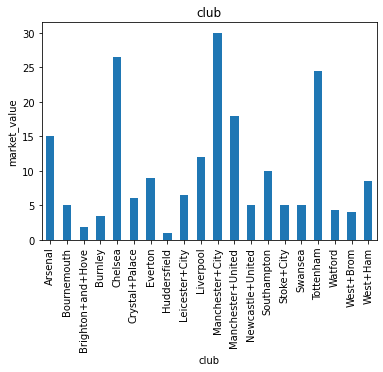

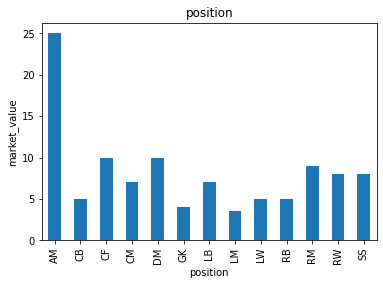

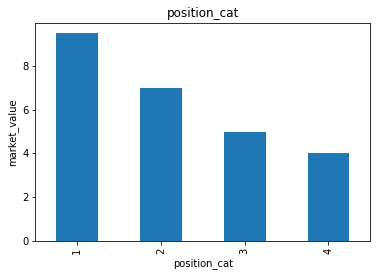

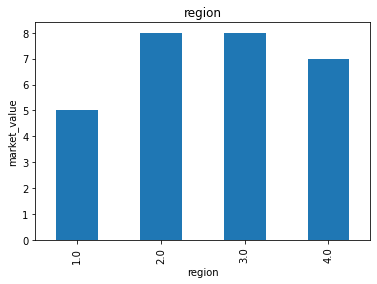

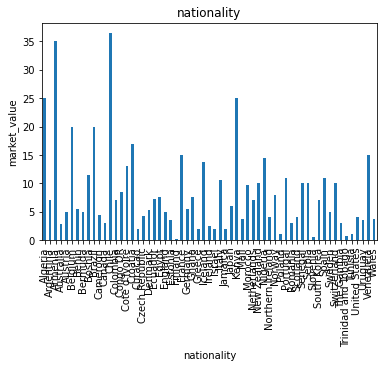

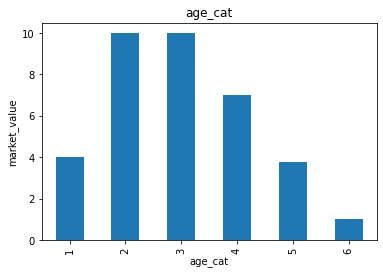

In [38]:
for feature in categorical_features:
  tempdata=data.copy()
  tempdata.groupby(feature)['market_value'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('market_value')
  plt.title(feature)
  plt.show()

In [39]:
sns.set(font_scale=1.5)

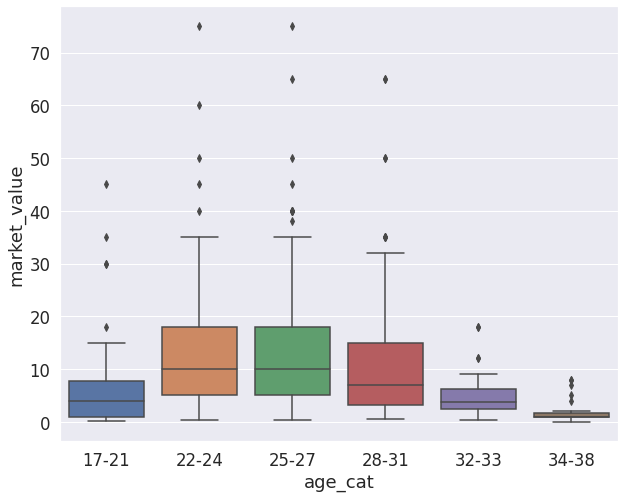

In [40]:
plt.figure(figsize=(10,8))
sns.boxplot(x='age_cat',y='market_value',data=temp_df,order=list(age_categories.values()))

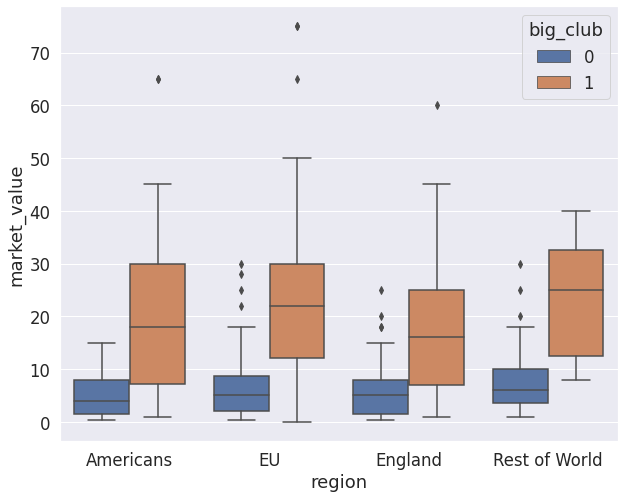

In [41]:
plt.figure(figsize=(10,8))
sns.boxplot(x='region',y='market_value',hue='big_club',data=temp_df)

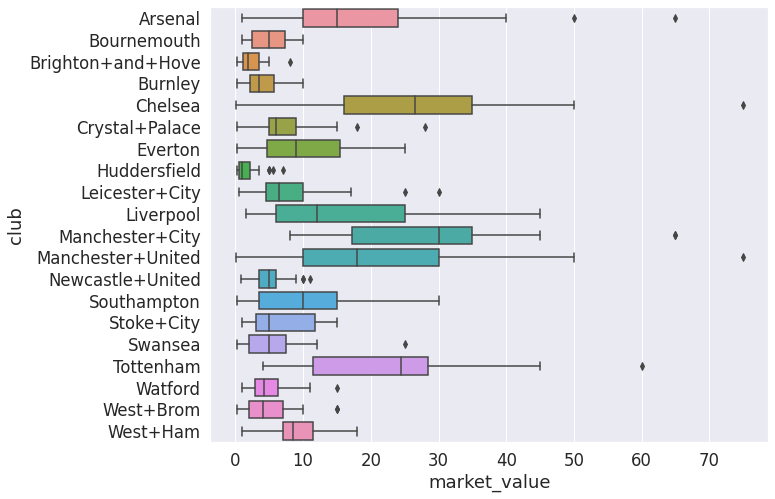

In [42]:
plt.figure(figsize=(10,8))
sns.boxplot(x='market_value',y='club',data=df)

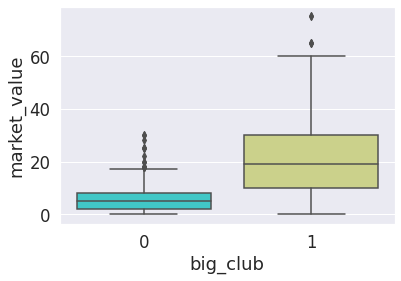

In [43]:
sns.boxplot(x='big_club',y='market_value',data=temp_data,palette='rainbow')

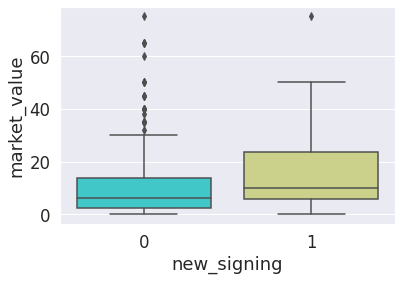

In [44]:
sns.boxplot(x='new_signing',y='market_value',data=temp_data,palette='rainbow')

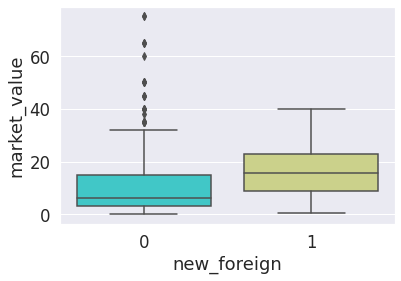

In [45]:
sns.boxplot(x='new_foreign',y='market_value',data=temp_data,palette='rainbow')

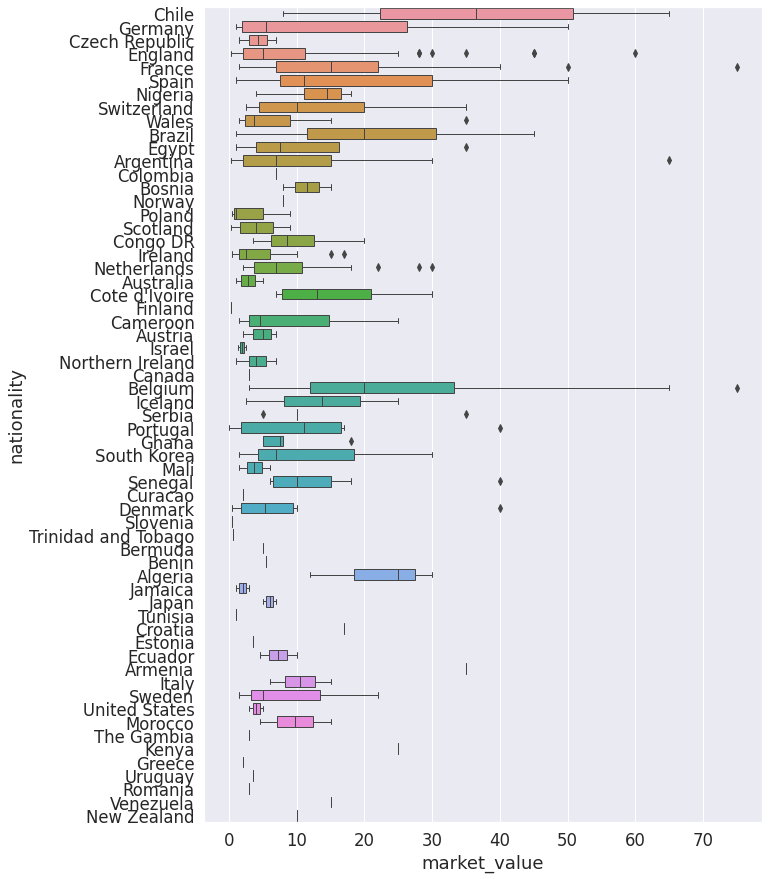

In [46]:
plt.figure(figsize=(10,15))
sns.boxplot(x='market_value',y='nationality',data=df,width=0.8,linewidth=1)

## Linear Regression Model

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [48]:
data=df[['age_cat','fpl_value','big_club','position_cat','region','club','new_signing','market_value']]

In [49]:
data=pd.get_dummies(data,columns=['age_cat','position_cat','region','club'])

In [50]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(columns='market_value'),data['market_value'],test_size=0.25,random_state=55)

In [51]:
X_train

,fpl_value,big_club,new_signing,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,position_cat_1,position_cat_2,position_cat_3,position_cat_4,region_1.0,region_2.0,region_3.0,region_4.0,club_Arsenal,club_Bournemouth,club_Brighton+and+Hove,club_Burnley,club_Chelsea,club_Crystal+Palace,club_Everton,club_Huddersfield,club_Leicester+City,club_Liverpool,club_Manchester+City,club_Manchester+United,club_Newcastle+United,club_Southampton,club_Stoke+City,club_Swansea,club_Tottenham,club_Watford,club_West+Brom,club_West+Ham
217,6.5,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
188,6.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
119,5.5,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
192,5.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
289,4.5,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,8.0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
381,6.0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
456,4.5,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
295,6.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [52]:
y_train

217    12.0
188     5.5
119    15.0
192     6.0
289     5.0
       ... 
29      5.0
381    28.0
456     5.0
295     9.0
154     3.5
Name: market_value, Length: 345, dtype: float64

In [53]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_pred=model.predict(X_test)
y_pred

array([  4.84375  ,  25.015625 ,  24.4140625,  18.234375 ,  40.453125 ,
         1.8125   ,  58.21875  ,  15.03125  ,   3.140625 ,   6.1875   ,
         1.203125 ,  15.078125 ,   2.875    ,  -1.8671875,  20.0625   ,
        15.46875  ,   5.609375 ,   8.046875 ,   5.4375   ,   0.65625  ,
         6.0078125,  30.1875   ,  11.640625 ,  13.484375 ,   4.       ,
         5.40625  ,  12.859375 ,  16.5390625,  15.46875  ,   8.265625 ,
        13.453125 ,   9.7421875,   4.1328125,   4.578125 ,   3.15625  ,
        -2.9375   ,   0.1484375,   9.390625 ,  24.6640625,   1.9765625,
        13.0703125,  -0.609375 ,  31.828125 ,   7.203125 ,   7.6484375,
        47.203125 ,   2.640625 ,   3.265625 ,   9.734375 ,   9.484375 ,
        -1.53125  ,  28.015625 ,   9.78125  ,   7.453125 ,   2.3203125,
        19.8671875,   4.1015625,  31.09375  ,  12.9921875,  21.7578125,
        -2.125    ,   8.859375 ,   9.796875 ,   2.9140625,   0.4609375,
         3.46875  ,   6.625    ,  18.4375   ,  -7.7734375,  11.4

In [55]:
print('R2 score on Trained data: ',model.score(X_train,y_train))
print('R2 score on Test data: ',model.score(X_test,y_test))

R2 score on Trained data:  0.7947934862381049
R2 score on Test data:  0.7272015351474185


In [56]:
from sklearn.metrics import mean_squared_error
print('Mean Square Error ',mean_squared_error(y_test,y_pred))

Mean Square Error  36.246853006297144


In [57]:
scale_data=data.copy()

In [58]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
for col in scale_data.columns:
    scale_data[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(data[col])),columns=[col])

In [59]:
scale_data

,fpl_value,big_club,new_signing,market_value,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,position_cat_1,position_cat_2,position_cat_3,position_cat_4,region_1.0,region_2.0,region_3.0,region_4.0,club_Arsenal,club_Bournemouth,club_Brighton+and+Hove,club_Burnley,club_Chelsea,club_Crystal+Palace,club_Everton,club_Huddersfield,club_Leicester+City,club_Liverpool,club_Manchester+City,club_Manchester+United,club_Newcastle+United,club_Southampton,club_Stoke+City,club_Swansea,club_Tottenham,club_Watford,club_West+Brom,club_West+Ham
0,0.941176,1.0,0.0,0.866578,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.647059,1.0,0.0,0.666444,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.176471,1.0,0.0,0.092728,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.411765,1.0,0.0,0.266177,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,1.0,0.0,0.292862,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,0.058824,0.0,1.0,0.066044,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
457,0.058824,0.0,1.0,0.092728,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
458,0.058824,0.0,0.0,0.059373,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
459,0.058824,0.0,1.0,0.012675,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [60]:
X_train1,X_test1,y_train1,y_test1=train_test_split(scale_data.drop(columns='market_value'),scale_data['market_value'],test_size=0.25,random_state=13)

In [61]:
model1=LinearRegression()
model1.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
print('R2 score on Trained data: ',model1.score(X_train1,y_train1))
print('R2 score on Test data: ',model1.score(X_test1,y_test1))

R2 score on Trained data:  0.7702971638407654
R2 score on Test data:  0.8139548709240797


In [63]:
from sklearn.metrics import mean_squared_error
y_pred1=model.predict(X_test)
print('Mean Square Error ',mean_squared_error(y_test1,y_pred1))

Mean Square Error  278.3253726650262
